In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, classification_report

sns.set_style('darkgrid')

In [3]:
# Load dataset
hr_data = pd.read_csv('hr_data.csv')
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
hr_data.duplicated(keep='first').sum()

3008

In [7]:
hr_data.drop_duplicates(inplace=True)

In [8]:
hr_data.select_dtypes('object')

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
11995,management,high
11996,management,high
11997,management,high
11998,marketing,high


## Exploratory Data Analysis (EDA)

In [9]:
num_cols = hr_data.select_dtypes(exclude = 'object').columns
cat_cols = hr_data.select_dtypes('object').columns

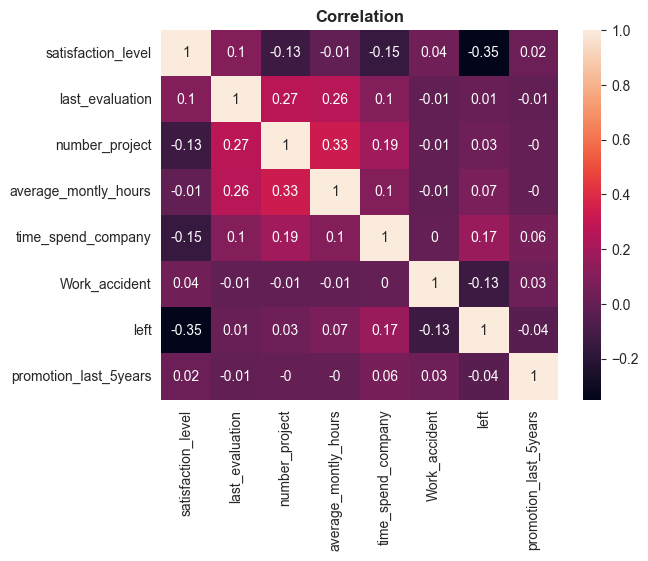

In [10]:
corr = round(hr_data[num_cols].corr(),2)
sns.heatmap(corr, annot=True)
plt.title("Correlation", fontweight='bold')
plt.show()

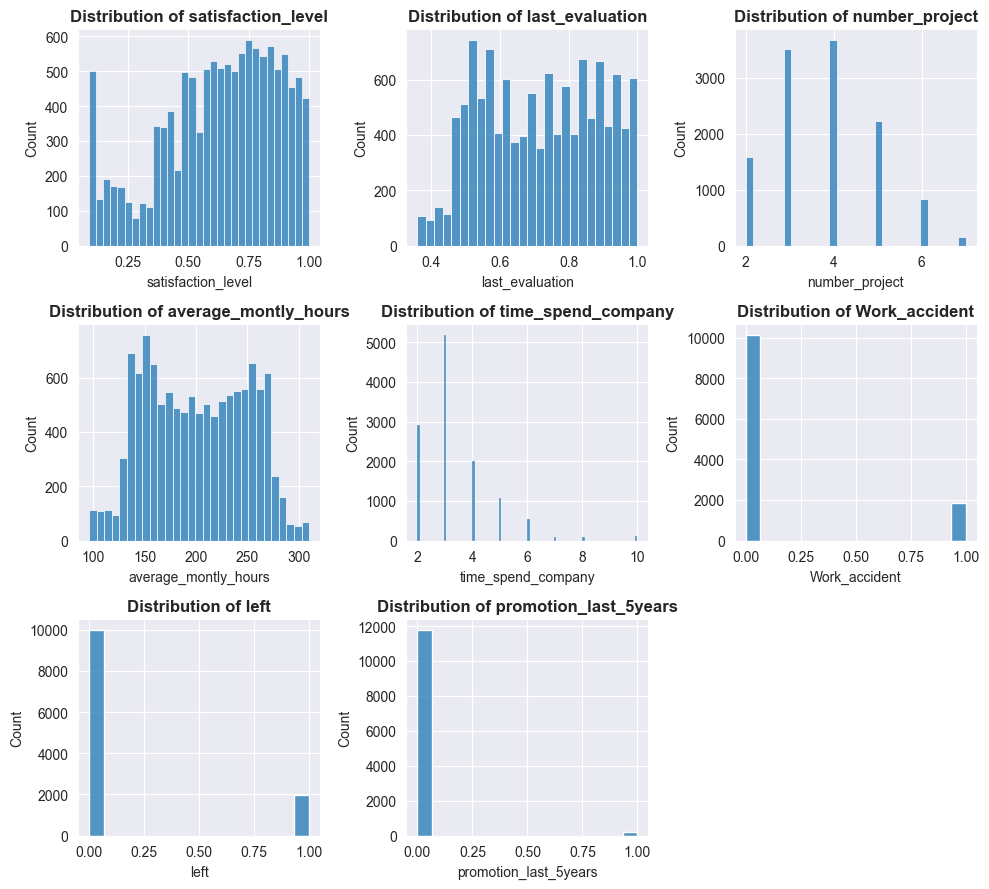

In [11]:
plt.figure(figsize=(10,9))
for index, k in enumerate(num_cols):
    plt.subplot(3,3, index+1)
    sns.histplot(x=k , data=hr_data)
    plt.title(f"Distribution of {k}", fontweight='bold')
plt.tight_layout()

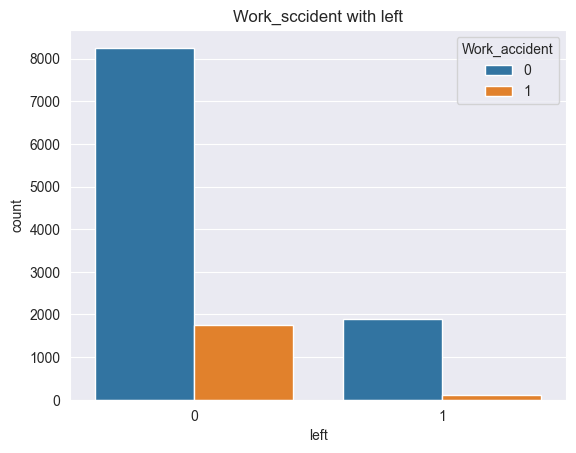

In [12]:
sns.countplot(x='left', data=hr_data, hue='Work_accident')
plt.title("Work_sccident with left")
plt.show()

In [13]:
hr_data['left'].value_counts()/hr_data.shape[0]*100

left
0    83.39588
1    16.60412
Name: count, dtype: float64

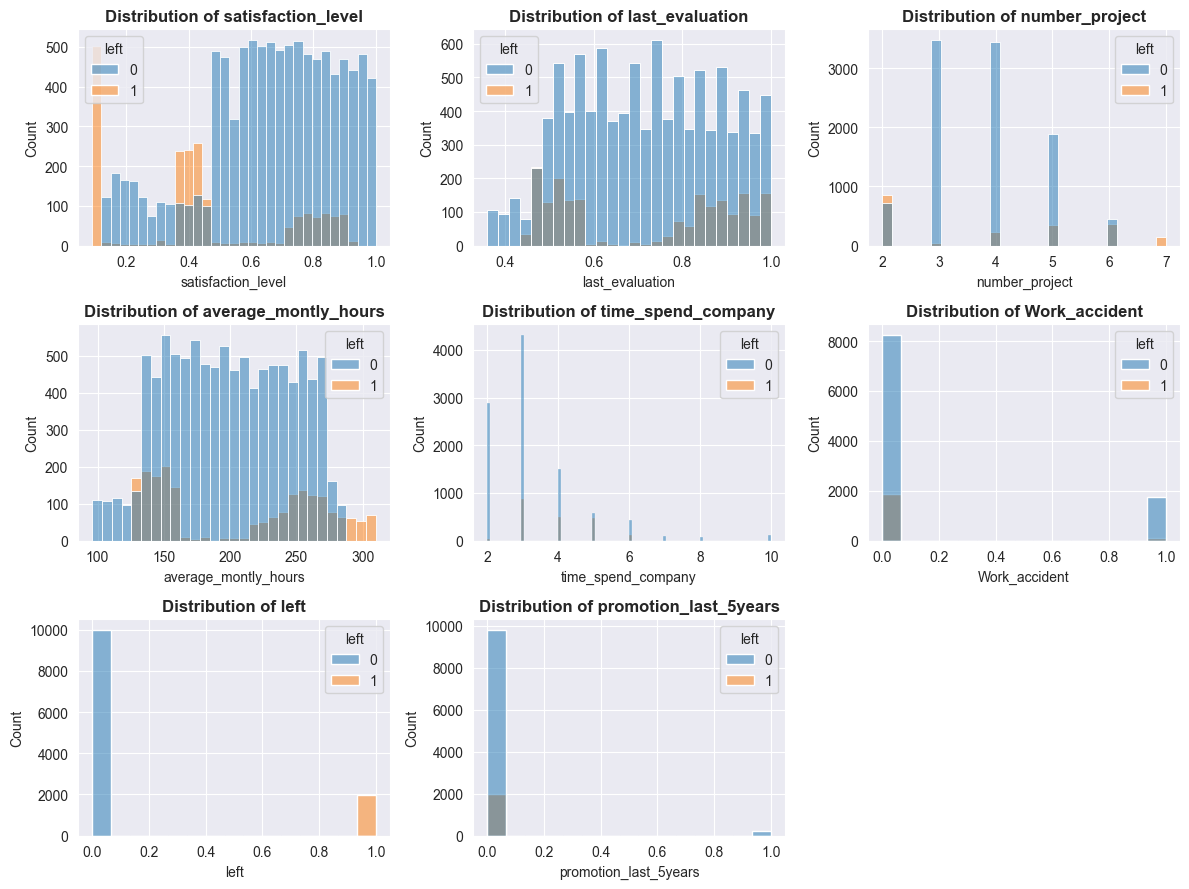

In [14]:
plt.figure(figsize=(12,9))
for index, k in enumerate(num_cols):
    plt.subplot(3,3, index+1)
    sns.histplot(x=k , data=hr_data, hue='left')
    plt.title(f"Distribution of {k}", fontweight='bold')
plt.tight_layout()

In [15]:
hr_data[cat_cols]['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

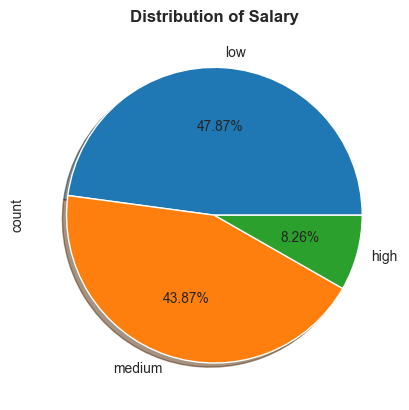

In [16]:
hr_data[cat_cols]['salary'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True)
plt.title("Distribution of Salary", fontweight='bold')
plt.show()

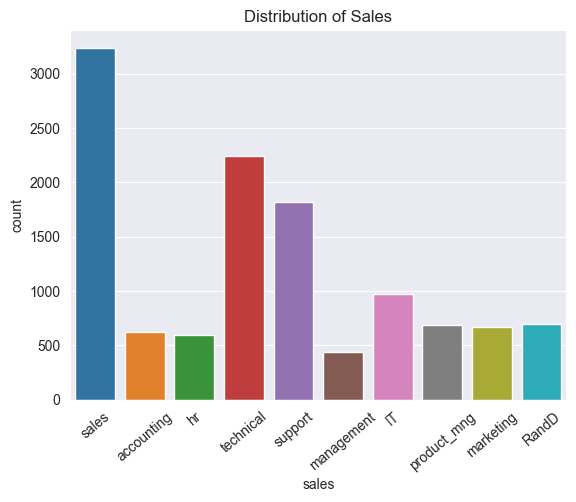

In [17]:
sns.countplot(x='sales', data=hr_data)
plt.title('Distribution of Sales')
plt.xticks(rotation=40)
plt.show()

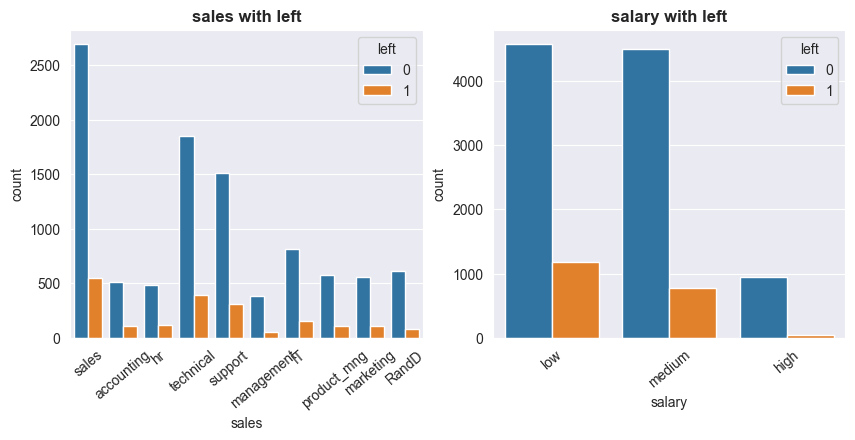

In [18]:
plt.figure(figsize=(10,4))
for index, i in enumerate(cat_cols):
    plt.subplot(1,2, index+1)
    sns.countplot(x=i, data=hr_data, hue='left')
    plt.xticks(rotation=40)
    plt.title(f"{i} with left", fontweight='bold')

In [19]:
num_cols

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [20]:
hr_data['promotion_last_5years'].value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

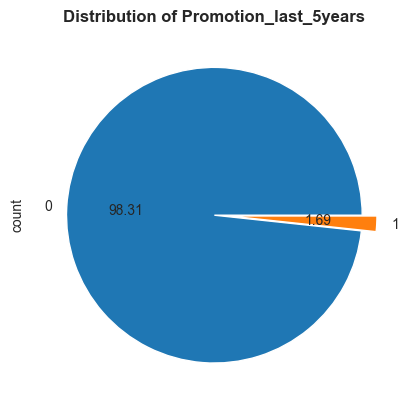

In [21]:
hr_data['promotion_last_5years'].value_counts().plot(kind='pie', autopct='%.2f', explode=[0,0.1])
plt.title("Distribution of Promotion_last_5years", fontweight='bold')
plt.show()

## Data Preprocessing

In [22]:
hr_data.rename(columns={'sales': 'department'}, inplace=True)

In [23]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [24]:
x = hr_data.drop(columns=['left'])
y = hr_data['left']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [26]:
cat_features = X_train.select_dtypes('object').columns
num_features = X_train.select_dtypes(exclude='object').columns

In [27]:
cat_features

Index(['department', 'salary'], dtype='object')

In [28]:
cat_pipeline = Pipeline([
    ('si', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder()),
    ('ss', StandardScaler(with_mean=False))
])

In [29]:
num_pipeline = Pipeline([
    ('si', SimpleImputer(strategy='median')),
    ('ss', StandardScaler(with_mean=False))
])

In [30]:
transformer = ColumnTransformer([
    ('cat_pipeline', cat_pipeline, cat_features),
    ('num_pipeline', num_pipeline, num_features)
])

In [31]:
X_train_new = transformer.fit_transform(X_train)
X_test_new = transformer.transform(X_test)

In [32]:
def evaluate_model(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    f1_sco = f1_score(actual, predicted)
    return accuracy, f1_sco

In [33]:
models ={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Classifier": KNeighborsClassifier()
}

model_list = []
f1_score_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_new, y_train)
    
    y_train_pred = model.predict(X_train_new)
    y_test_pred = model.predict(X_test_new)
    
    model_train_accuracy, model_train_f1_score = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_f1_score = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance on Train set:")
    print("Accuracy score : {:.2f}".format(model_train_accuracy))
    print("F1 score : {:.2f}".format(model_train_f1_score))
    print()
    print("Model Performance on Test set:")
    print("Accuracy score : {:.2f}".format(model_test_accuracy))
    print("F1-score : {:.2f}".format(model_test_f1_score))
    
    f1_score_list.append(model_test_f1_score)
    
    print("="*35)
    print("\n")
    

Logistic Regression
Model Performance on Train set:
Accuracy score : 0.84
F1 score : 0.29

Model Performance on Test set:
Accuracy score : 0.83
F1-score : 0.30




Decision Tree
Model Performance on Train set:
Accuracy score : 1.00
F1 score : 1.00

Model Performance on Test set:
Accuracy score : 0.97
F1-score : 0.92


Random Forest
Model Performance on Train set:
Accuracy score : 1.00
F1 score : 1.00

Model Performance on Test set:
Accuracy score : 0.98
F1-score : 0.96


AdaBoost
Model Performance on Train set:
Accuracy score : 0.97
F1 score : 0.89

Model Performance on Test set:
Accuracy score : 0.96
F1-score : 0.89


Gradient Boost
Model Performance on Train set:
Accuracy score : 0.98
F1 score : 0.95

Model Performance on Test set:
Accuracy score : 0.98
F1-score : 0.95


Support Vector Classifier
Model Performance on Train set:
Accuracy score : 0.95
F1 score : 0.85

Model Performance on Test set:
Accuracy score : 0.95
F1-score : 0.85


K-Nearest Classifier
Model Performance on Train set:
Accuracy score : 0.96
F1 score : 0.88

Model Performance on Test set:
Accuracy score : 0.95
F1-score : 0.86




In [34]:
pd.DataFrame(list(zip(model_list, f1_score_list)), columns=['Model', 'f1_score']).sort_values(by=['f1_score'], ascending=False)

,Model,f1_score
2,Random Forest,0.955882
4,Gradient Boost,0.954327
1,Decision Tree,0.915691
3,AdaBoost,0.894032
6,K-Nearest Classifier,0.858148
5,Support Vector Classifier,0.853365
0,Logistic Regression,0.302829


### Random Forest

In [35]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train_new, y_train)
y_test_pred = r_forest.predict(X_test_new)

print(classification_report(y_test, y_test_pred))
print(f"F1_score of the model : {f1_score(y_test, y_test_pred)}")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1976
           1       0.99      0.92      0.95       423

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

F1_score of the model : 0.9547123623011017


### Gradient Boosting

In [36]:
g_boost = GradientBoostingClassifier()
g_boost.fit(X_train_new, y_train)
y_test_pred = g_boost.predict(X_test_new)

print(classification_report(y_test, y_test_pred))
print(f"F1_score of the model : {f1_score(y_test, y_test_pred)}")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1976
           1       0.97      0.94      0.95       423

    accuracy                           0.98      2399
   macro avg       0.98      0.97      0.97      2399
weighted avg       0.98      0.98      0.98      2399

F1_score of the model : 0.954326923076923
